# EDA on Unemployment rates across Countries

## Data Gathering

Sets the Window to the Full Screen Size in Jupyter Notebook

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Imports the pandas library

In [2]:
import pandas as pd

The following lines of code, read in two CSV files (Unemployment Data and Countries Data) that are stored in the data folder. This used the `read_csv` function from the Pandas library, that was imported in the line above.

In [3]:
unemployment = pd.read_csv('data/country_total.csv')
countries = pd.read_csv('data/countries.csv')

## Data preprocessing

After the intial collection of data, it is important to assess the data that exists in the two `Data Frames` that we have loaded. 

Useful functions, include:
- `Head`
- `Shape`
- `dtypes`
- `describe`

In [4]:
unemployment.head(10)

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9
5,at,nsa,1993.06,134000,3.5
6,at,nsa,1993.07,128000,3.4
7,at,nsa,1993.08,130000,3.4
8,at,nsa,1993.09,132000,3.5
9,at,nsa,1993.10,141000,3.7


In [5]:
unemployment.shape

(20796, 5)

In [6]:
unemployment.dtypes

country               object
seasonality           object
month                float64
unemployment           int64
unemployment_rate    float64
dtype: object

In [7]:
unemployment.describe()

,month,unemployment,unemployment_rate
count,20796.000000,2.079600e+04,19851.000000
mean,1999.401290,7.900818e+05,8.179764
std,7.483751,1.015280e+06,3.922533
min,1983.010000,2.000000e+03,1.100000
25%,1994.090000,1.400000e+05,5.200000
50%,2001.010000,3.100000e+05,7.600000
75%,2006.010000,1.262250e+06,10.000000
max,2010.120000,4.773000e+06,20.900000


We can also do these for our second Data Frame.

In [8]:
countries.head(10)

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682
5,cz,CZ,eu,Czech Republic,République tchèque,Tschechische Republik,49.803531,15.474998
6,dk,DK,eu,Denmark,Danemark,Dänemark,55.939684,9.516689
7,ee,EE,eu,Estonia,Estonie,Estland,58.592469,25.806950
8,fi,FI,eu,Finland,Finlande,Finnland,64.950159,26.067564
9,fr,FR,eu,France,France,Frankreich,46.710994,1.718561


In [9]:
countries.shape

(30, 8)

In [10]:
countries.dtypes

country                 object
google_country_code     object
country_group           object
name_en                 object
name_fr                 object
name_de                 object
latitude               float64
longitude              float64
dtype: object

In [11]:
countries.describe()

,latitude,longitude
count,30.000000,30.000000
mean,49.092609,14.324579
std,7.956624,11.257010
min,35.129141,-8.239122
25%,43.230916,6.979186
50%,49.238087,14.941462
75%,54.090400,23.351690
max,64.950159,35.439795


These four functions offer a simple insight into of our DFs.

- `head` - Retrieves the top rows of the DF
- `shape` - Retrieves the dimensions of the DF
- `dtypes`- Retrieves the data types of the DF
- `describe` - Retrieves statistics for the numerical based data types of the DF

## Feature Engineering

Feature Engineering appears earlier than normal for a standard ML process, but here it is good so that we can adjust the `month` column from the `Unemployment` Data Frame.

The code below, includes renaming the existing column to an appropriate name and inserts new columns for both `month` and `year`. The `year` column is generated by using the `astype(int)` function that extracts the year as the value before the decimal point. The `month` column is generated by subtracting `year` from `year_month` that would leave a decimal indicating the month of the year. This decimal is multiplied by 100 and then rounded to the nearest whole number due to the Floating Point Problem in binary.

In [12]:
unemployment['year'] = unemployment['month'].astype(int)
unemployment.rename(columns={'month' : 'year_month'}, inplace=True)
unemployment['month'] = ((unemployment['year_month'] - unemployment['year']) * 100).round(0).astype(int)
unemployment.head(5)

,country,seasonality,year_month,unemployment,unemployment_rate,year,month
0,at,nsa,1993.01,171000,4.5,1993,1
1,at,nsa,1993.02,175000,4.6,1993,2
2,at,nsa,1993.03,166000,4.4,1993,3
3,at,nsa,1993.04,157000,4.1,1993,4
4,at,nsa,1993.05,147000,3.9,1993,5


The `countries` Data Frame can be used to add more value to the `unemployment` Data Frame. Both DFs have a similar column called `country`, which can be used to merge both DFs together. Additonally, we can drop the unneeded columns from the `countries` DF.

In [13]:
country_lookup = countries[['country', 'country_group','name_en']]
country_lookup.head(5)

,country,country_group,name_en
0,at,eu,Austria
1,be,eu,Belgium
2,bg,eu,Bulgaria
3,hr,non-eu,Croatia
4,cy,eu,Cyprus


In [14]:
df_merge = pd.merge(unemployment, country_lookup, on='country')
df_merge.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,country_group,name_en
0,at,nsa,1993.01,171000,4.5,1993,1,eu,Austria
1,at,nsa,1993.02,175000,4.6,1993,2,eu,Austria
2,at,nsa,1993.03,166000,4.4,1993,3,eu,Austria
3,at,nsa,1993.04,157000,4.1,1993,4,eu,Austria
4,at,nsa,1993.05,147000,3.9,1993,5,eu,Austria


Reordering Columns and dropping the column `Country` (which is an abbreviation)

In [15]:
df_merge = df_merge[['name_en', 'country_group','seasonality',
                             'year_month', 'year', 'month',
                             'unemployment', 'unemployment_rate']]
df_merge.head()

,name_en,country_group,seasonality,year_month,year,month,unemployment,unemployment_rate
0,Austria,eu,nsa,1993.01,1993,1,171000,4.5
1,Austria,eu,nsa,1993.02,1993,2,175000,4.6
2,Austria,eu,nsa,1993.03,1993,3,166000,4.4
3,Austria,eu,nsa,1993.04,1993,4,157000,4.1
4,Austria,eu,nsa,1993.05,1993,5,147000,3.9


## Exploratory data analysis (EDA) - Part 1

EDA is important for gaining a deeper understanding of the data, by exploring and visualising trends, patterns and anomalies in the dataset.

In [16]:
df_merge.describe()

,year_month,year,month,unemployment,unemployment_rate
count,20796.000000,20796.000000,20796.000000,2.079600e+04,19851.000000
mean,1999.401290,1999.336411,6.487882,7.900818e+05,8.179764
std,7.483751,7.483875,3.447054,1.015280e+06,3.922533
min,1983.010000,1983.000000,1.000000,2.000000e+03,1.100000
25%,1994.090000,1994.000000,3.000000,1.400000e+05,5.200000
50%,2001.010000,2001.000000,6.000000,3.100000e+05,7.600000
75%,2006.010000,2006.000000,9.000000,1.262250e+06,10.000000
max,2010.120000,2010.000000,12.000000,4.773000e+06,20.900000


In [17]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20796 entries, 0 to 20795
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name_en            20796 non-null  object 
 1   country_group      20796 non-null  object 
 2   seasonality        20796 non-null  object 
 3   year_month         20796 non-null  float64
 4   year               20796 non-null  int32  
 5   month              20796 non-null  int32  
 6   unemployment       20796 non-null  int64  
 7   unemployment_rate  19851 non-null  float64
dtypes: float64(2), int32(2), int64(1), object(3)
memory usage: 1.3+ MB


`unemployment_rate` has missing values, the countries these relate to can be shown in the code below. We will have the evaluate the missing values and come to a decision on how best to deal with them later.

In [18]:
df_merge['unemployment_rate_null'] = df_merge['unemployment_rate'].isnull()
df_merge[df_merge['unemployment_rate'].isnull()]['name_en'].value_counts()

Croatia     216
Bulgaria    180
Malta       180
Spain       117
Slovakia    108
Poland       72
Hungary      36
Slovenia     36
Name: name_en, dtype: int64

In [19]:
df_merge['seasonality'].value_counts()

sa       7020
trend    6936
nsa      6840
Name: seasonality, dtype: int64

`Seasonality` stands for:
- `NSA` - Not seasonally adjusted
- `SA` - Seasonally adjusted
- `trend` - Trend cycle

In [20]:
df_merge['name_en'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic',
       'Germany (including  former GDR from 1991)', 'Denmark', 'Estonia',
       'Spain', 'Finland', 'France', 'Greece', 'Croatia', 'Hungary',
       'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Sweden',
       'Slovenia', 'Slovakia', 'Turkey', 'United Kingdom'], dtype=object)

In [21]:
df_merge['name_en'].value_counts()

France                                       1008
Sweden                                       1008
Portugal                                     1008
Netherlands                                  1008
Luxembourg                                   1008
Denmark                                      1008
Belgium                                      1008
Spain                                        1008
Ireland                                      1008
United Kingdom                               1002
Italy                                         924
Finland                                       828
Norway                                        786
Austria                                       648
Hungary                                       576
Slovakia                                      576
Slovenia                                      576
Bulgaria                                      576
Malta                                         576
Poland                                        576


In [22]:
df_merge['year'].min(), df_merge['year'].max()

(1983, 2010)

In [23]:
df_merge['unemployment_rate'].describe()

count    19851.000000
mean         8.179764
std          3.922533
min          1.100000
25%          5.200000
50%          7.600000
75%         10.000000
max         20.900000
Name: unemployment_rate, dtype: float64

Shows the top 5 and bottom five 

In [24]:
df_merge.sort_values('unemployment_rate',ascending=False)[:5]

,name_en,country_group,seasonality,year_month,year,month,unemployment,unemployment_rate,unemployment_rate_null
15526,Poland,eu,nsa,2004.02,2004,2,3531000,20.9,False
15525,Poland,eu,nsa,2004.01,2004,1,3520000,20.7,False
15514,Poland,eu,nsa,2003.02,2003,2,3460000,20.7,False
5663,Spain,eu,sa,2010.09,2010,9,4773000,20.6,False
15527,Poland,eu,nsa,2004.03,2004,3,3475000,20.6,False


In [25]:
df_merge.sort_values('unemployment_rate',ascending=True)[:5]

,name_en,country_group,seasonality,year_month,year,month,unemployment,unemployment_rate,unemployment_rate_null
17501,Sweden,eu,nsa,1989.06,1989,6,50000,1.1,False
17513,Sweden,eu,nsa,1990.06,1990,6,52000,1.1,False
17495,Sweden,eu,nsa,1988.12,1988,12,59000,1.3,False
17502,Sweden,eu,nsa,1989.07,1989,7,64000,1.3,False
17500,Sweden,eu,nsa,1989.05,1989,5,59000,1.3,False


In [26]:
df_merge.groupby(['country_group','year'])['unemployment_rate'].mean()

country_group  year
eu             1983    8.243056
               1984    8.532222
               1985    8.475278
               1986    8.861757
               1987    8.746465
               1988    7.845370
               1989    7.145370
               1990    6.731713
               1991    7.371296
               1992    8.416009
               1993    9.592480
               1994    9.832724
               1995    9.372561
               1996    9.156915
               1997    8.719167
               1998    8.779767
               1999    8.609191
               2000    8.669479
               2001    8.539167
               2002    8.539062
               2003    8.437500
               2004    8.530380
               2005    8.057173
               2006    7.218882
               2007    6.333542
               2008    6.241042
               2009    8.857292
               2010    9.850715
non-eu         1989    5.219444
               1990    5.616667
               1991 

Confirms the code we ran previously but in a friendlier format

In [27]:
unemployment_rate = df_merge.groupby(['name_en','year'], as_index=False)['unemployment_rate'].mean()

unemployment_rate.sort_values('unemployment_rate',ascending=False)[:5]

,name_en,year,unemployment_rate
524,Spain,2010,20.072222
416,Poland,2002,19.991667
417,Poland,2003,19.663889
508,Spain,1994,19.522222
52,Bulgaria,2001,19.402778


In [28]:
unemployment_rate.sort_values('unemployment_rate',ascending=True)[:5]

,name_en,year,unemployment_rate
531,Sweden,1989,1.544444
322,Luxembourg,1990,1.650000
323,Luxembourg,1991,1.655556
532,Sweden,1990,1.738889
321,Luxembourg,1989,1.783333


In [29]:
unemployment_rate.sort_values('unemployment_rate',ascending=False)[:5]

,name_en,year,unemployment_rate
524,Spain,2010,20.072222
416,Poland,2002,19.991667
417,Poland,2003,19.663889
508,Spain,1994,19.522222
52,Bulgaria,2001,19.402778


The codes we have ran above, gives insight into:
- Understanding the attributes in categorical columns
- How EU and Non-EU countries stack up against each other for Unemployment rate
- Identifying the Missing Values
- Using the describe command, to get descriptive statistics on the numerical values

### Dealing with Missing Values

What the normal processing are - why are we dropping them

In [30]:
df_merge.dropna(subset=['unemployment_rate'], inplace=True)

In [31]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19851 entries, 0 to 20795
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name_en                 19851 non-null  object 
 1   country_group           19851 non-null  object 
 2   seasonality             19851 non-null  object 
 3   year_month              19851 non-null  float64
 4   year                    19851 non-null  int32  
 5   month                   19851 non-null  int32  
 6   unemployment            19851 non-null  int64  
 7   unemployment_rate       19851 non-null  float64
 8   unemployment_rate_null  19851 non-null  bool   
dtypes: bool(1), float64(2), int32(2), int64(1), object(3)
memory usage: 1.2+ MB


## Exploratory data analysis (EDA) - Part 2

The Pandas library has in-built functionality for data visualisation, including histograms and graphs.

Histograms (`hist()`) can show the spread of data in the dataset, which is important as we evaluate `unemployment_rates`. We can use this to show the distrubution for different countries as well as Country groups.

<AxesSubplot:>

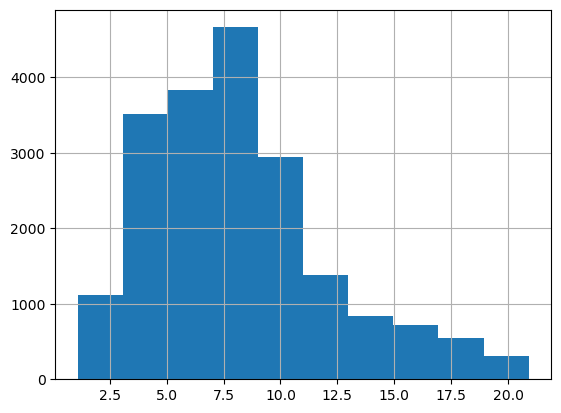

In [32]:
df_merge['unemployment_rate'].hist()

<AxesSubplot:>

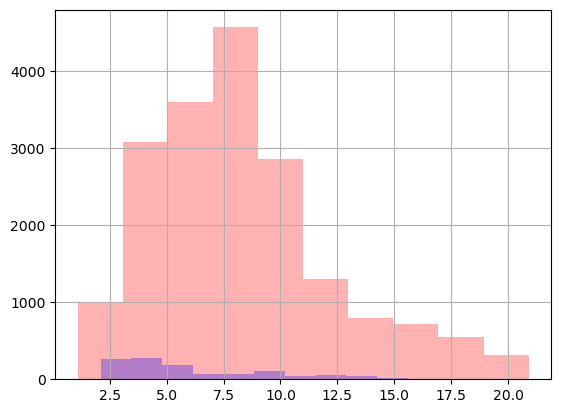

In [33]:
df_merge[df_merge['country_group'] == 'eu']['unemployment_rate'].hist(color='Red', alpha=0.3)
df_merge[df_merge['country_group'] == 'non-eu']['unemployment_rate'].hist(color='Blue',alpha=0.3)

A key observation made during the EDA stage was the significant disparity in the amount of data available for the two different attributes in `country_group`, EU and non-EU countries. This is demonstrated through the histogram above which shows the unsuitability of certain visualisations to represent data.

Histograms can be used to show the distribution of values in the data set easily, as can be shown below.

array([[<AxesSubplot:title={'center':'year_month'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'unemployment'}>],
       [<AxesSubplot:title={'center':'unemployment_rate'}>,
        <AxesSubplot:>]], dtype=object)

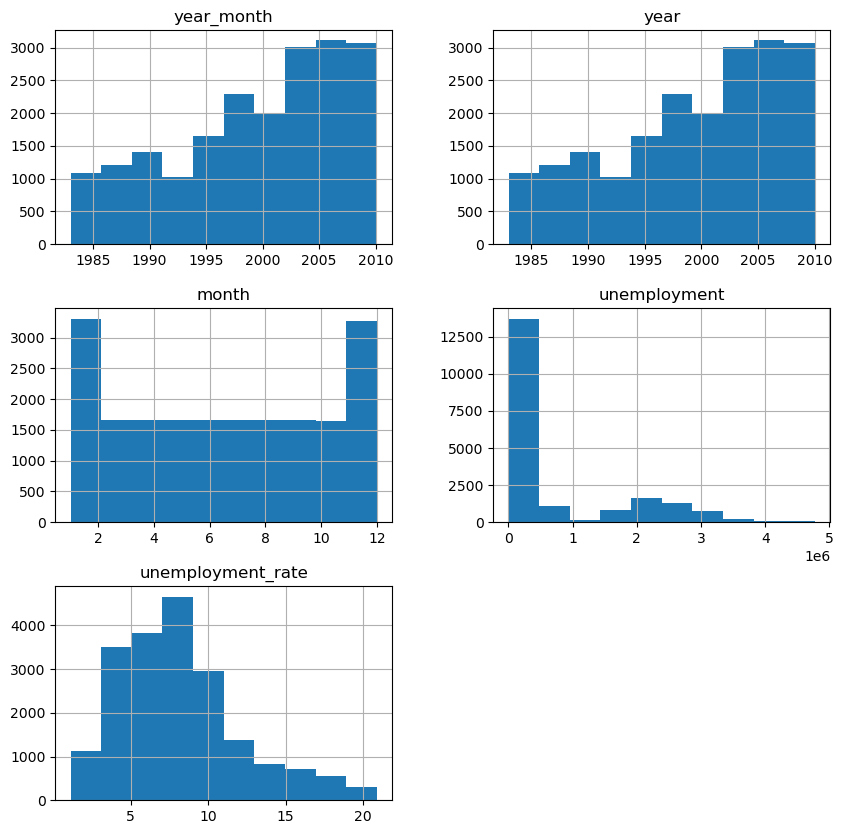

In [34]:
df_merge.hist(figsize=(10,10))

<AxesSubplot:>

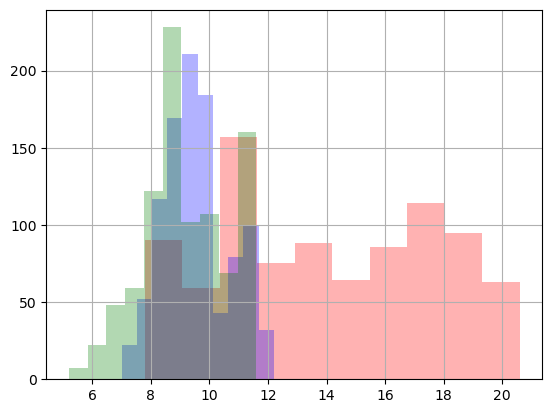

In [35]:
df_merge[df_merge['name_en'] == 'Spain']['unemployment_rate'].hist(color='Red', alpha=0.3)
df_merge[df_merge['name_en'] == 'France']['unemployment_rate'].hist(color='Blue',alpha=0.3)
df_merge[df_merge['name_en'] == 'Italy']['unemployment_rate'].hist(color='Green',alpha=0.3)

Here we can see the better use of the Histogram visualisation, as we can see similarities between France's and Italy's unemployment rates. With both being spread around 8% to 10%, whereas Spain is spread up to 20%.

In [36]:
df_merge.insert(loc=2, column='date',value=pd.to_datetime(unemployment['month'].astype(str) + '/' +'1/'+ unemployment['year'].astype(str), format='%m/%d/%Y'))
df_merge.head()

,name_en,country_group,date,seasonality,year_month,year,month,unemployment,unemployment_rate,unemployment_rate_null
0,Austria,eu,1993-01-01,nsa,1993.01,1993,1,171000,4.5,False
1,Austria,eu,1993-02-01,nsa,1993.02,1993,2,175000,4.6,False
2,Austria,eu,1993-03-01,nsa,1993.03,1993,3,166000,4.4,False
3,Austria,eu,1993-04-01,nsa,1993.04,1993,4,157000,4.1,False
4,Austria,eu,1993-05-01,nsa,1993.05,1993,5,147000,3.9,False


In [37]:
uer_all = df_merge[['date', 'name_en','unemployment_rate']]
uer_all.rename(columns={'date' : 'Time Period','name_en' : 'Country','unemployment_rate' : 'Unemployment Rate'}, inplace=True)
uer_all.columns = ['TimePeriod', 'CountryName', 'UnemploymentRate'] # hack to save time
uer_all.set_index('TimePeriod',inplace=True)
uer_all.head()

C:\Users\Sam.Sutton\AppData\Local\Continuum\anaconda3\TEMP\ipykernel_12392\3024944581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uer_all.rename(columns={'date' : 'Time Period','name_en' : 'Country','unemployment_rate' : 'Unemployment Rate'}, inplace=True)


,CountryName,UnemploymentRate
TimePeriod,,
1993-01-01,Austria,4.5
1993-02-01,Austria,4.6
1993-03-01,Austria,4.4
1993-04-01,Austria,4.1
1993-05-01,Austria,3.9


The below graph shows the `unemployment_rate` for all countries across the different years in the dataset. It displays the upper and lower bounds (minimum and maximum) for the Unemployment Rate

<AxesSubplot:title={'center':'Unemployment Rate\n'}, xlabel='TimePeriod'>

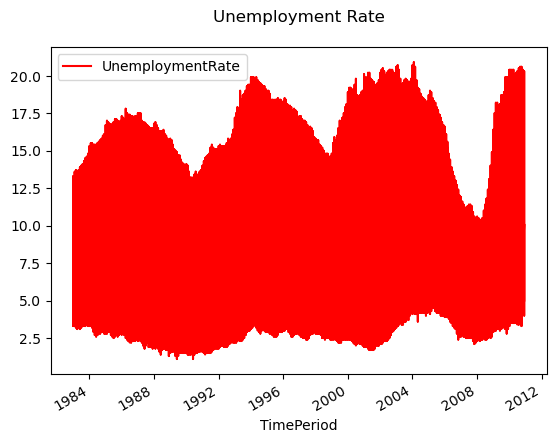

In [38]:
uer_all.plot(title='Unemployment Rate\n', color=['red'])

Previously we viewed the distribution of Spain, France and Italy as Histograms for the distribution of the Unemployment Rate. To build on this comaprision between the 3 countries, we can plot a line graph to view Spain, France and Italy for all seasonally adjusted data (shown by `seasonality` being set to `sa`) and use this across Date to show how the `unemployment_rate` affected all countries from 1984 to 2010.

The code below creates a copy of the Data Frame where Spain, France and Italy where present and the seasonality was set. We then aid readability by renaming the column names and the `inplace` variable means that it will change the new Data Frame we created directly.

The same colour schemes were used and once again we can see the similat curves for both France and Italy but we can see that even though Spain starts to follow the same trend from roughly 2000 to 2005 that the differences a noticable. With Spain hitting two clear peaks for `Unemployment Rate` in 1994 and 2010.

In [39]:
sfi_graph = df_merge[(df_merge['name_en'].isin(['Spain', 'France','Italy'])) & (df_merge['seasonality'] == 'sa')].copy()
sfi_graph = sfi_graph[['date', 'name_en','unemployment_rate']]
sfi_graph.rename(columns={'date' : 'TimePeriod','name_en' : 'Country','unemployment_rate' : 'UnemploymentRate'}, inplace=True)

<AxesSubplot:title={'center':'Unemployment Rate\n'}, xlabel='TimePeriod'>

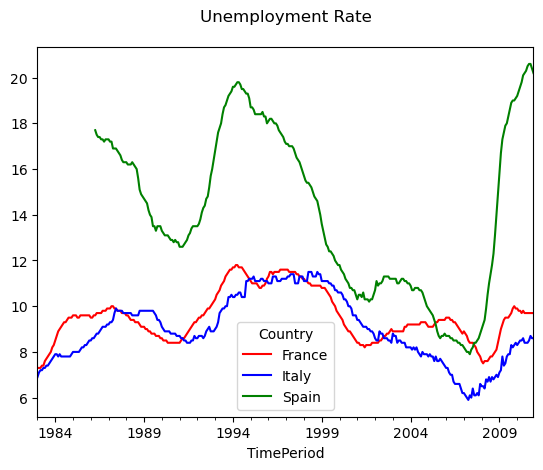

In [40]:
sfi_graph = sfi_graph.pivot(index='TimePeriod', columns='Country', values='UnemploymentRate')
sfi_graph.plot(title='Unemployment Rate\n', color=['red','blue','green'])

The final comparison I wanted to run was against EU countries versus non-EU countries, the previous histogram was not suitable for the dataset due to the amount of data being made avaliable for EU countries being significantly larger.

The line graph analysis would show the average `unemployment_rate` for EU vs non-EU countries for each year, offering up insight into the performance of the two differing categories.

In [43]:
grouped_df = df_merge.groupby(['year', 'country_group'])['unemployment_rate'].mean().reset_index()
grouped_df.head(20)

,year,country_group,unemployment_rate
0,1983,eu,8.243056
1,1984,eu,8.532222
2,1985,eu,8.475278
3,1986,eu,8.861757
4,1987,eu,8.746465
5,1988,eu,7.845370
6,1989,eu,7.145370
7,1989,non-eu,5.219444
8,1990,eu,6.731713
9,1990,non-eu,5.616667


The code above creates the Data Frame `grouped_df`, as uses the `grouped_by` function on Country Group to allow for the average `unemployment_rate` to be calculated.

The printed Data Frame above shows the `grouped_df` we created, we can also see that we have data for `eu` country groups from 1983 to 1988 where we do not have `non_eu` data. This will not allow for a clear comparison to run, so this data should be removed.

<AxesSubplot:title={'center':'Unemployment Rate\n'}, xlabel='Year'>

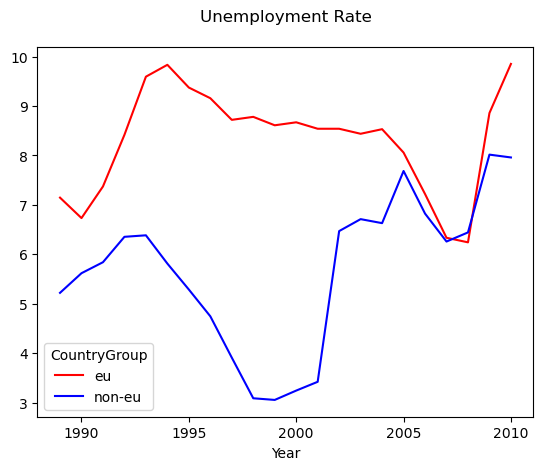

In [63]:
grouped_df = grouped_df[(grouped_df['year'] > 1988) ]
grouped_df.rename(columns={'year' : 'Year','country_group' : 'CountryGroup','unemployment_rate' : 'UnemploymentRate'}, inplace=True)
grouped_df = grouped_df.pivot(index='Year', columns='CountryGroup', values='UnemploymentRate')
grouped_df.plot(title='Unemployment Rate\n', color=['red','blue'])

Due to the missing data, all EU data before 1988 was removed, to allow for a direct comparison. The data frame was plotted to pivot the once again renamed `Unemployment Rate` against that of the `Year`.

The graph shows us of the low `Unemployment Rate` across `non_eu` countries until 2005 where they catch up with `eu` countries, since then the two have been similar until the `Unemployment Rate` has increased significantly again.